## Delving into non-parametric methods using pandas and scipy

In [1]:
# prompt: mount to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7
sns.set_style("whitegrid")

### The Spearman Rank Correlation

In [5]:
address = '/content/drive/MyDrive/python-for-data-science-and-machine-learning-essential-training-part-1-3006708-main (1)/data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


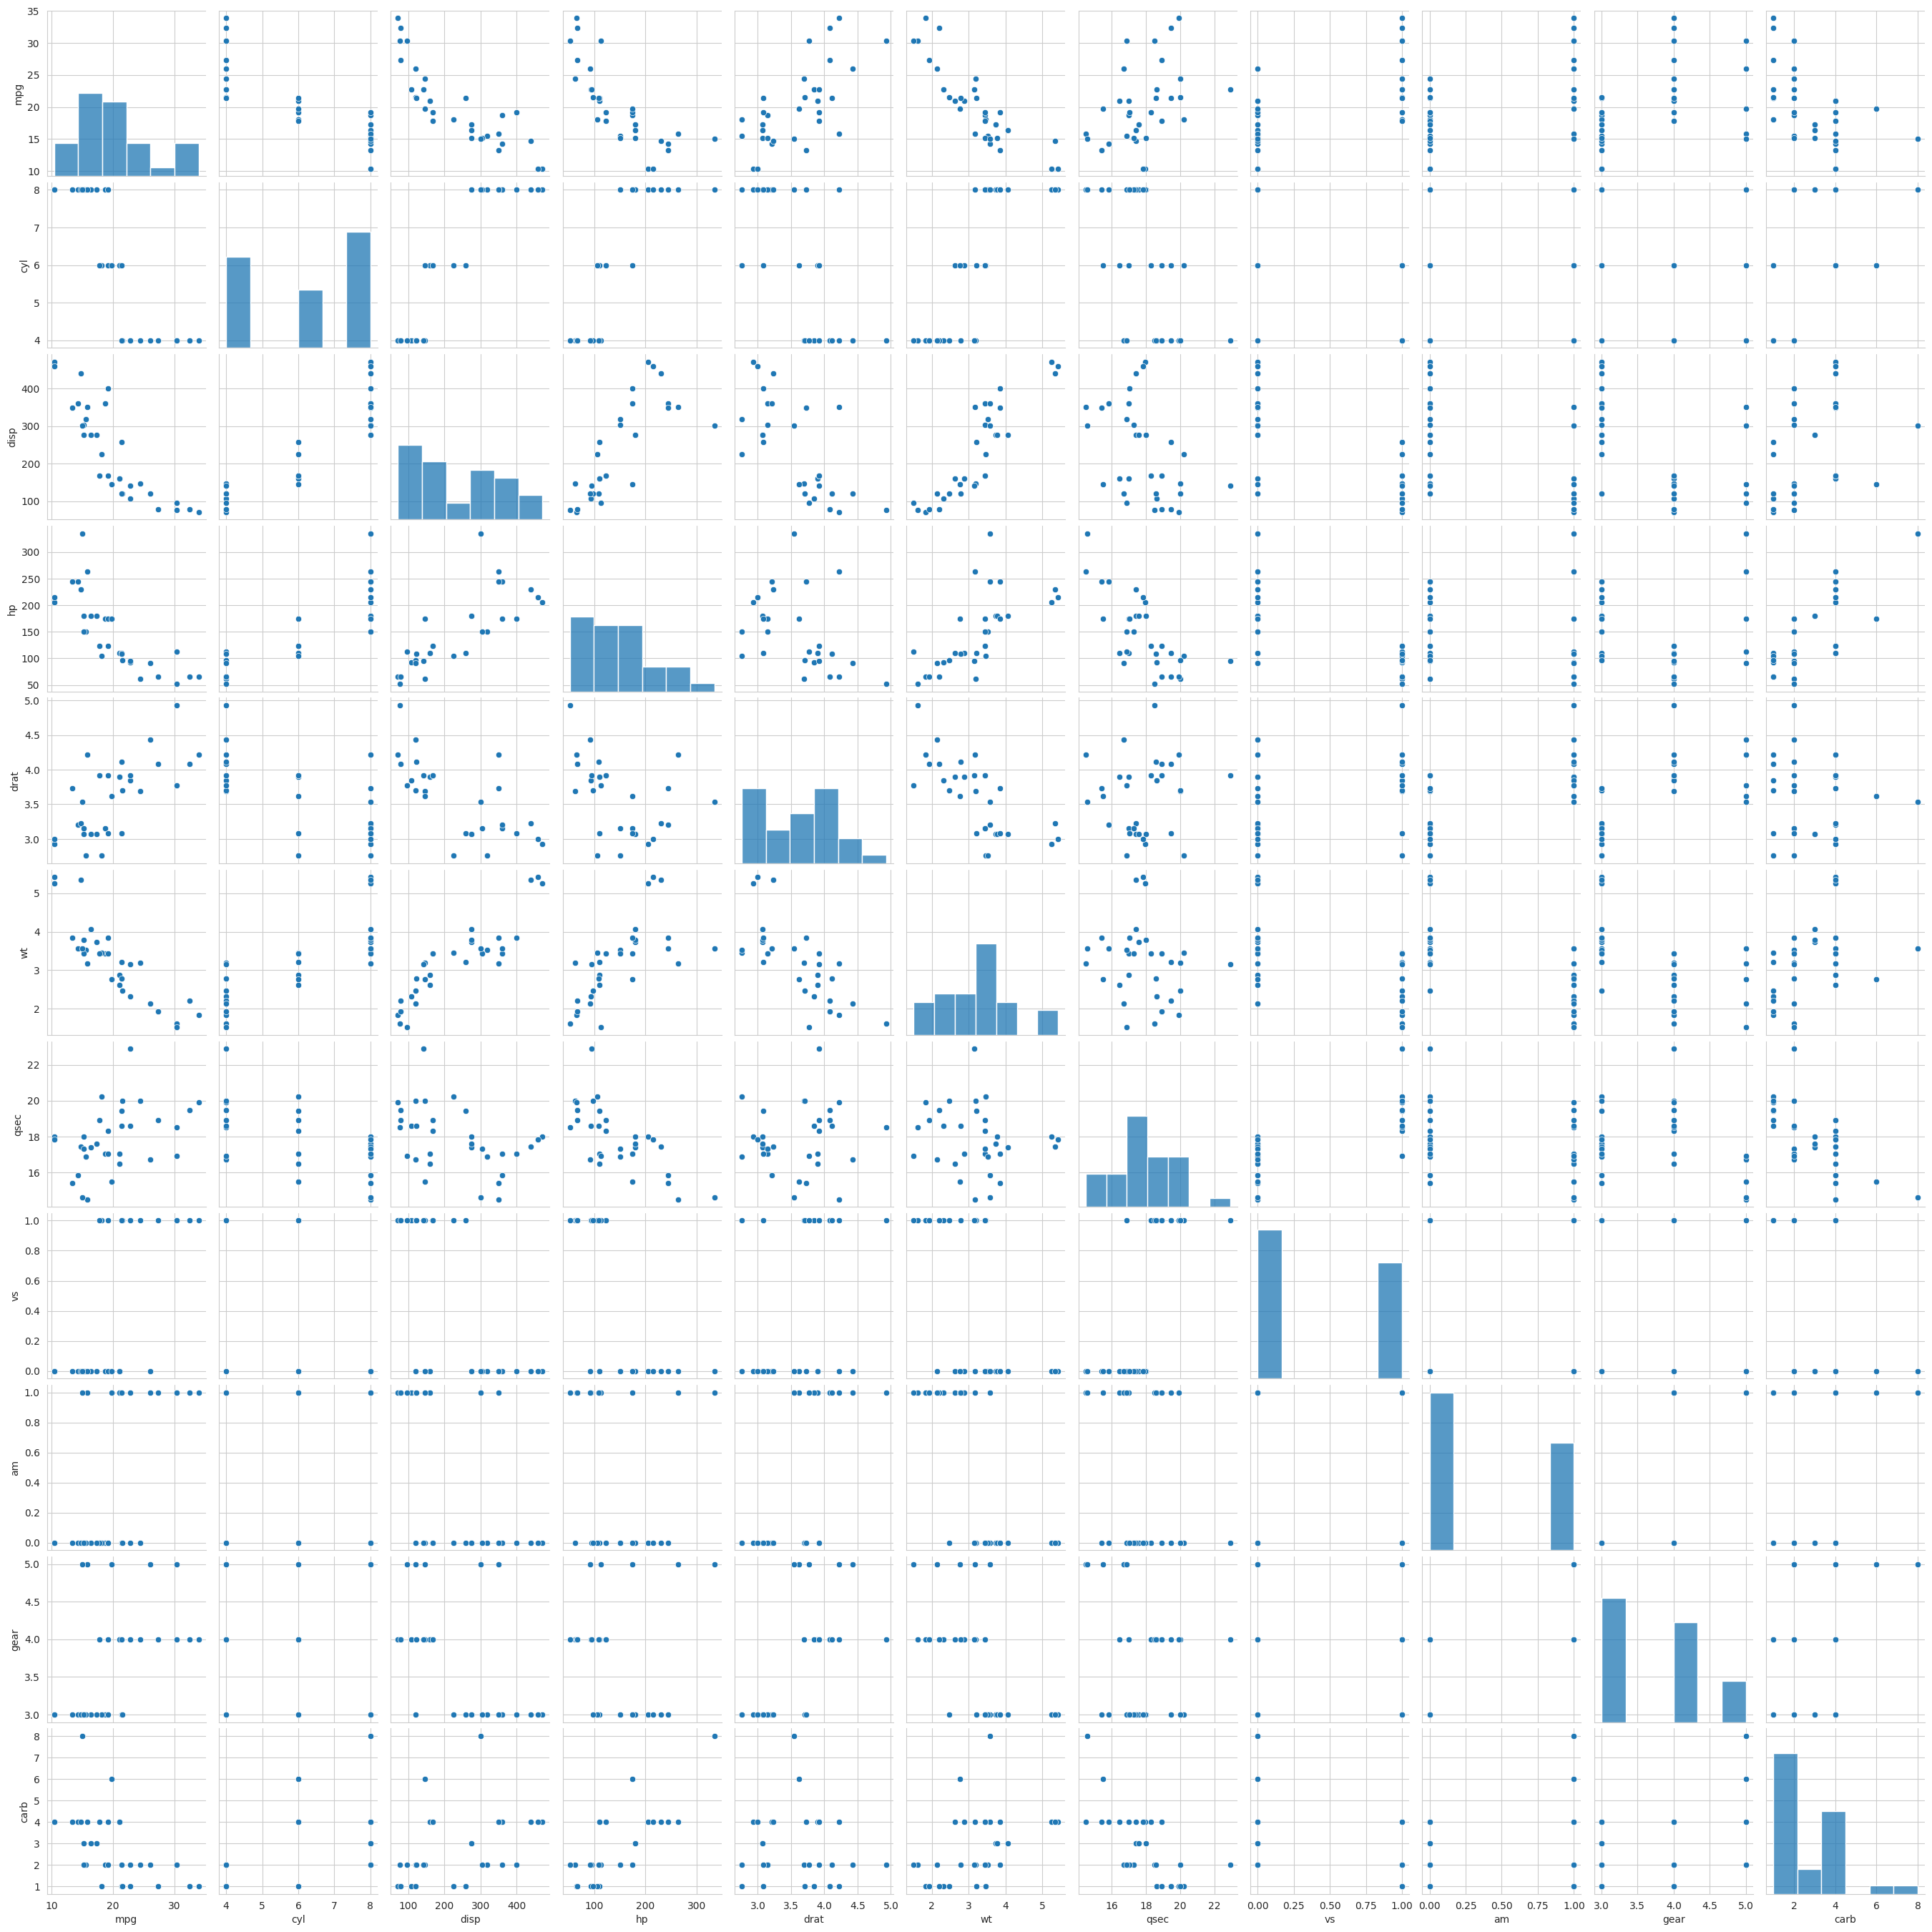

In [6]:
sns.pairplot(cars)

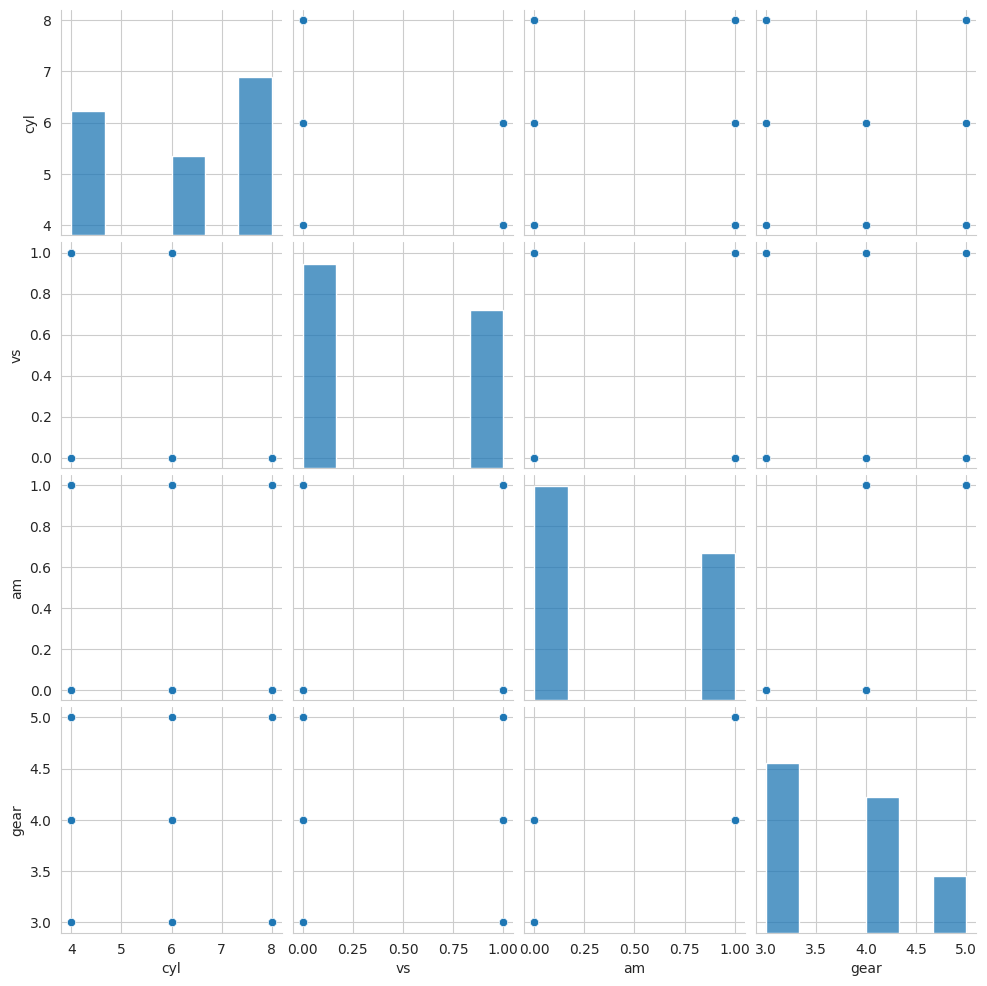

In [7]:
x = cars[['cyl', 'vs', 'am', 'gear']]
sns.pairplot(x)

In [8]:
cyl =cars['cyl']
vs=cars['vs']
am=cars['am']
gear=cars['gear']

spearmanr_coefficient, pvalue = spearmanr(cyl,vs)
print('Spearman Rank Correlation Coefficient %.3f' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.814


In [9]:
spearmanr_coefficient, pvalue = spearmanr(cyl,am)
print('Spearman Rank Correlation Coefficient %.3f' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.522


In [10]:
spearmanr_coefficient, pvalue = spearmanr(cyl,gear)
print('Spearman Rank Correlation Coefficient %.3f' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.564


### Chi-square test for independence

In [14]:
table = pd.crosstab(cyl,am)
from scipy.stats import chi2_contingency
chi2, p , dof, expected = chi2_contingency(table.values)
print('Chi-square Stratistic %0.3f p_value %.3f' % (chi2,p))

Chi-square Stratistic 8.741 p_value 0.013


In [15]:
table = pd.crosstab(cyl,vs)
chi2, p , dof, expected = chi2_contingency(table.values)
print('Chi-square Stratistic %0.3f p_value %.3f' % (chi2,p))

Chi-square Stratistic 21.340 p_value 0.000


In [16]:
table = pd.crosstab(cyl,gear)
chi2, p , dof, expected = chi2_contingency(table.values)
print('Chi-square Stratistic %0.3f p_value %.3f' % (chi2,p))

Chi-square Stratistic 18.036 p_value 0.001
